# OOP and Gradient Descent

# Class and Object

A class combines data/attribute and functionality/method together

An object is an instance of a class

In [26]:
from math import sqrt

class Vector():
    dim = 2
    
    def __init__(self, input_x, input_y):
        self.x = input_x
        self.y = input_y
    
    def length(self):
        return sqrt(self.x**2 + self.y**2)
    
    def scale(self, c):
        self.x = self.x * c
        self.y = self.y * c
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
    def normalize(self):
        self.scale(1/self.length())
        
    
    def add(self, other):
        return Vector(self.x + other.x, self.y + other.y)
    
    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)
        

In [27]:
v = Vector(3,4)
w = Vector(1,0)
z = v.add(w)
print(v,w,z)

(3,4) (1,0) (4,4)


In [28]:
p = v + w 
print(v,w,p)

(3,4) (1,0) (4,4)


# Gradient Descent

Problem: minimize f(x), $x \in \mathbb{R}^d$

Suppose $\nabla f(x) = [f'(x_1), f'(x_2), ... , f'(x_d)]^T$ is the gradient of the function $f(x)$ at point $x$, and we have some initial guess $x_0$.

Our goal is to generate a sequence of numbers $x_0$, $x_1$, $x_2$ ... that iteratively approaches a local minimizer of the function.

Idea: the gradient of a function at a point gives the direction of the steepest ascent of the function at that point. So, if we move in the opposite direction of the gradient, we should be moving towards a local minimum.

$$x_{i+1} = x_i - \alpha \nabla f(x_i)$$

where $\alpha$ is the step size or learning rate. We repeat this process until $|f'(x_i)|$ is close to 0 for some $i$.

Note:

- This algorithm tends to go to the closest local minimum.

- If $\nabla f(x_i)=0$, then we are at stationary point so we won't move.

- In the simplest form $\alpha$ is fixed by the user. For more advanced versions, it will be adaptive or randomized.





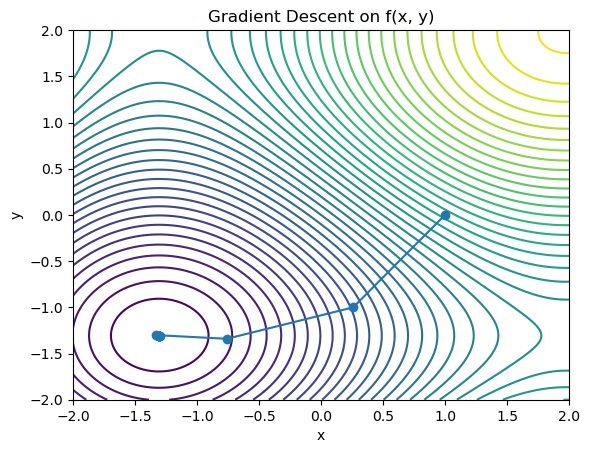

Final objective value: -15.891646751230518


In [31]:
import numpy as np
import matplotlib.pyplot as plt


# test function
# f = lambda x, y: x**2 + y**2 
# grad_f = lambda x, y: Vector(2 * x , 2 * y)

# test function2
f = lambda x, y: x**2 + y**2 + 10 * np.sin(x) + 10 * np.sin(y)
grad_f = lambda x, y: Vector(2 * x + 10 * np.cos(x), 2 * y + 10 * np.cos(y))

# initial guess and learning rate
point = Vector(1,0)
learning_rate = 0.1
points = [point]

# Gradient descent algorithm
for _ in range(10):  # Fewer iterations for clarity
    grad = grad_f(point.x, point.y)
    grad.scale(-learning_rate)
    point = point + grad
    points.append(point)


# Create a grid of x, y points for the contour plot
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Contour plot
plt.contour(X, Y, Z, levels=50)  # Adjust the number of levels for more detail

# Gradient descent path
x_coords = [p.x for p in points]
y_coords = [p.y for p in points]
plt.plot(x_coords, y_coords, '-o')

plt.title('Gradient Descent on f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# print final objective value and final point
print(f'Final objective value: {f(point.x, point.y)}')

